In [1]:
%load_ext sql
%pylab inline  
import pandas as pd
import yaml
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Populating the interactive namespace from numpy and matplotlib


In [2]:
%sql $connection_string

'Connected: student@postgres'

In [37]:
cars_table = %sql SELECT * FROM cars;


398 rows affected.


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cars = cars_table.DataFrame()


In [39]:
cars.head(8) ## Return first 7 rows of data

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii


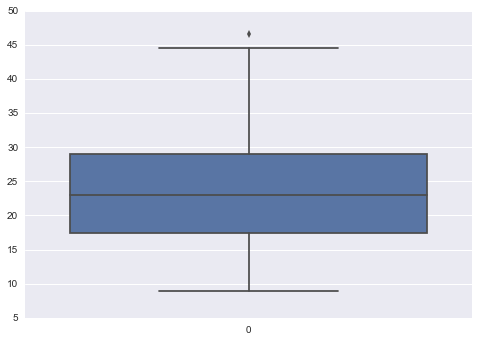

In [40]:
sns.boxplot(data=cars.mpg) ##Box plot of MPG

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


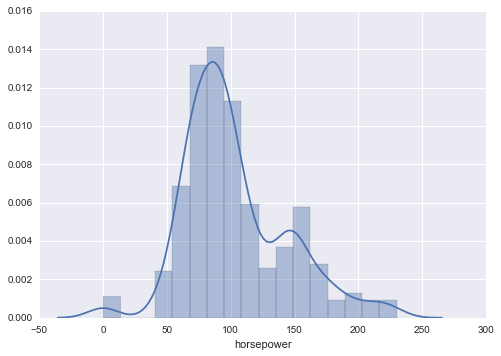

In [41]:
cars = cars.fillna(0)
cars
sns.distplot(cars.horsepower)  ## histogram of gorsepower

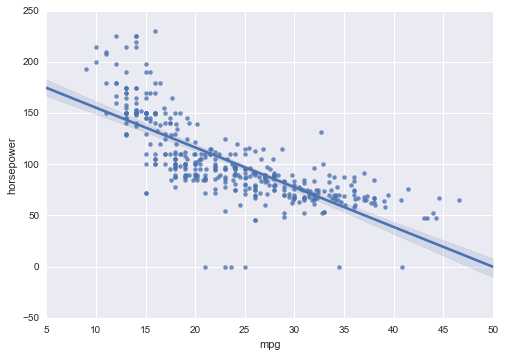

In [48]:
sns.regplot(x=cars.mpg,y=cars.horsepower) ##scatterplot of mpg vs horsepower

In [52]:
cars.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [63]:
average_weight = cars.groupby(['model']).mean()

In [64]:
print(average_weight)

       index        mpg  cylinders  displacement  horsepower       weight  \
model                                                                       
70      14.0  17.689655   6.758621    281.413793  147.827586  3372.793103   
71      42.5  21.250000   5.571429    209.750000  103.214286  2995.428571   
72      70.5  18.714286   5.821429    218.375000  120.178571  3237.714286   
73     104.5  17.100000   6.375000    256.875000  130.475000  3419.025000   
74     138.0  22.703704   5.259259    171.740741   90.740741  2877.925926   
75     166.5  20.266667   5.600000    205.533333  101.066667  3176.800000   
76     198.5  21.573529   5.647059    197.794118  101.117647  3078.735294   
77     229.5  23.375000   5.464286    191.392857  105.071429  2997.357143   
78     261.5  24.061111   5.361111    177.805556   99.694444  2861.805556   
79     294.0  25.093103   5.827586    206.689655  101.206897  3055.344828   
80     323.0  33.696552   4.137931    115.827586   72.137931  2436.655172   

In [ ]:
pd.crosstab(cars.cylinders,cars)